Step 0: Score = 0
Restored state
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Step 100: Score = -210
Restored state
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le bord de la grille !
Collision avec le

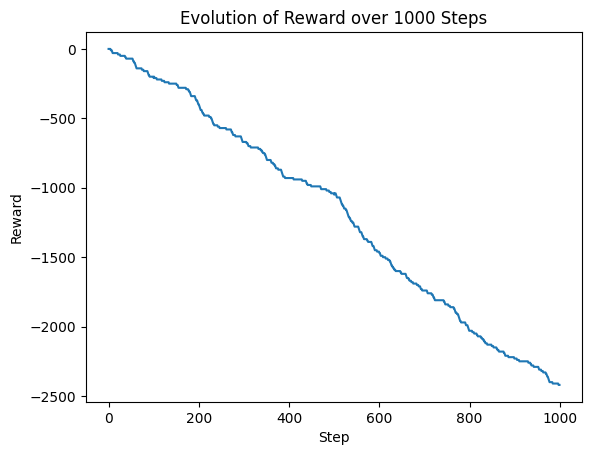

In [12]:
import random
import matplotlib.pyplot as plt

class GreedyPlayer:
    def __init__(self, n, eps, game, alpha, gamma = 0.5):
        self.n = n
        self.eps = eps
        self.game = game
        self.eval_count = [0] * n
        self.action_values = {}
        self.alpha = alpha
        self.gamma = gamma
    
    def _greedy_action(self, state):
        if state in self.action_values:
            max_value_estimation = max(self.action_values[state])
            bests_actions = [i for i, value in enumerate(self.action_values[state]) if value == max_value_estimation]
            return random.choice(bests_actions)
        else:
            self.action_values[state] = [0.0] * self.n
            return self._random_action()

    def reward(self, action, reward, state, next_state):
        if state not in self.action_values:
            self.action_values[state] = [0.0] * self.n
        if next_state not in self.action_values:
            self.action_values[next_state] = [0.0] * self.n
        
        # self.eval_count[action] += 1
        # self.action_values[action] += (reward - self.action_values[action]) / self.eval_count[action]
        current_q_value = self.action_values[state][action]
        max_next_q_value = max(self.action_values[next_state])

        self.action_values[state][action] = (1-self.alpha) * current_q_value + self.alpha * (reward + self.gamma * max_next_q_value)
        # (reward - self.action_values[state][action]) / self.eval_count[action]

    def get_action(self, state):
        random_value = random.random()
        explore = random_value < self.eps
        
        if explore:
            return self._random_action()
        else:
            return self._greedy_action(state)
        
    def _random_action(self):
        return random.randint(0, self.n - 1)

class ShortSnake:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.grid = [[0 for _ in range(grid_size)] for _ in range(grid_size)]
        
        # Init du serpent
        self.snake_pos = [grid_size // 2, grid_size // 2]
        self.snake_dir = "droite"
        self.grid[self.snake_pos[1]][self.snake_pos[0]] = 1

        # Init du fruit
        self.fruit_pos = self.generer_fruit()
        self.grid[self.fruit_pos[1]][self.fruit_pos[0]] = 2

        self.score = 0

    def __str__(self):
        for ligne in self.grid:
            print(" ".join(map(str, ligne)))
        print("Score : " + self.score.__str__())

    def generer_fruit(self):
        while True:
            x = random.randint(0, self.grid_size - 1)
            y = random.randint(0, self.grid_size - 1)
            if [x, y] != self.snake_pos:
                return [x, y]
            
    def move(self, direction=None):
        # Le serpent prend sa direction initiale, si aucune autre n'est indiquée
        if direction is not None:
            self.snake_dir = direction

        # Calcul de la nouvelle position
        snake_pos_x, snake_pos_y = self.snake_pos
        match(self.snake_dir):
            case "haut":
                snake_pos_y -= 1
            case "bas":
                snake_pos_y += 1
            case "droite":
                snake_pos_x += 1
            case "gauche":
                snake_pos_x -= 1
        
        # Vérification des limite de la grille
        if not (0 <= snake_pos_x < self.grid_size and 0 <= snake_pos_y < self.grid_size):
            print("Collision avec le bord de la grille !")
        if snake_pos_x < 0:
            snake_pos_x = self.grid_size - 1
            self.score -= 10
        elif snake_pos_x >= self.grid_size:
            snake_pos_x = 0
            self.score -= 10
        if snake_pos_y < 0:
            snake_pos_y = self.grid_size - 1
            self.score -= 10
        elif snake_pos_y >= self.grid_size:
            snake_pos_y = 0
            self.score -= 10
        
        # Remise à 0 de la position initial
        self.grid[self.snake_pos[1]][self.snake_pos[0]] = 0
        self.snake_pos = [snake_pos_x, snake_pos_y]
        
        # Génération d'un nouveau fruit si le fruit en cours a été mangé
        if self.snake_pos == self.fruit_pos:
            self.score += 10
            self.fruit_pos = self.generer_fruit()
            self.grid[self.fruit_pos[1]][self.fruit_pos[0]] = 2

        # Mise a jour de la grille si tout est ok
        self.grid[self.snake_pos[1]][self.snake_pos[0]] = 1

    def save_state(self):
        # return (self.snake_pos, self.snake_dir, self.fruit_pos, self.score, self.grid)
        return (tuple(self.snake_pos), self.snake_dir, tuple(self.fruit_pos), self.score, tuple(tuple(row) for row in self.grid))
    
    def restore_state(self, state):
        self.snake_pos = state[0]
        self.snake_dir = state[1]
        self.fruit_pos = state[2]
        self.score = state[3]
        self.grid = [list(row) for row in state[4]]
        print("Restored state")

if __name__ == "__main__":
    # taille = 5
    # jeu = ShortSnake(taille)
    # jeu.__str__()
    # print(' ')
    # jeu.move("haut")
    # jeu.__str__()

    taille = 5
    jeu = ShortSnake(taille)
    joueur = GreedyPlayer(4, 0.1, jeu, 0.1)
    rewards = []
    for i in range(1000):
        etat = jeu.save_state()
        action = joueur.get_action(etat)
        jeu.move(["haut", "bas", "droite", "gauche"][action])
        joueur.reward(action, jeu.score, etat, jeu.save_state())
        rewards.append(jeu.score)
        jeu.restore_state(etat)

    plt.plot(rewards)
    plt.xlabel('Step')
    plt.ylabel('Reward')
    plt.title('Evolution of Reward over 1000 Steps')
    plt.show()